### Case Study: Identifying Mispriced Corporate Bonds Using Real Credit Spread Data

This project focuses on generating alpha by identifying mispriced corporate bonds through credit spread analysis using real market data. We'll find bonds where the credit spread is wider than justified by the issuer's fundamentals, indicating potential undervaluation and an opportunity for excess returns.

#### Credit Spread

The credit spread is the difference in yield between a corporate bond and a risk-free government bond of similar maturity.

It compensates investors for the additional credit risk associated with the corporate bond.
A wider credit spread suggests higher perceived risk, which may be due to market inefficiencies or overestimations of the issuer's default risk.

The credit spread $s$ is calculates as: $$s=y_{corp} - y_{gov}$$ 

where $y_{corp}$ is the yield to maturity of the corporate bond and $y_{gov}$ is the yield to maturity of a risk-free goverment bond with similar maturity.

The expected excess return $R_{excess}$ from investing in the corporate bond is:

$$R_{excess}=s-\Delta s - (\text{PD} \times \text{LGD})$$

where:

* $\Delta s$: expected change in the credit spread over the investment horizon.
* PD: Probability of default of the corporate bond issuer.
* LGD: Loss given default (% of the exposure that is lost if the issuer defaults).

Alpha $\alpha$ represents the excess return over a benchmark or expected return: 

$$\alpha = R_{actual} - R_{benchmark}$$

#### Data

* Government Bond Yields:
U.S. Treasury yields are considered risk-free rates.
Data can be obtained from the Federal Reserve Economic Data (FRED).

* Corporate Bond Yields:
Individual corporate bond data is not freely available in detail due to market restrictions.
Corporate bond ETFs can serve as proxies for corporate bond yields.
Examples: LQD (Investment Grade), HYG (High Yield).
Alternatively, use credit spreads data from indices like the ICE BofA US Corporate Index, but access may be limited.

##### Approach

Use individual corporate bonds from well-known companies where yield data is accessible.
For demonstration purposes, we'll use bonds issued by companies like Apple Inc. (AAPL), Microsoft Corporation (MSFT), and Amazon.com, Inc. (AMZN).
We'll obtain their bond yield data from financial APIs or databases like FINRA Market Data, Investing.com, or Quandl.
Note: Access to detailed bond data may require subscriptions or API keys.

##### Steps

* Obtain Government Bond Yields:
Get U.S. Treasury yields for various maturities from FRED.
Use pandas_datareader to fetch the data.

* Obtain Corporate Bond Yields:
Use bond-specific data from sources like FINRA TRACE data.
Alternatively, use corporate bond ETFs as proxies.

* Calculate Credit Spreads:
Match corporate bond maturities with corresponding Treasury yields.
Compute the spreads.

* Perform Fundamental Analysis:
Use credit ratings from agencies like Moody's or S&P.
Analyze financial statements for key metrics.

* Identify Mispricing:
Compare current spreads to historical averages or industry benchmarks.
Determine if the spreads are wider than justified.
Make Investment Decisions:
Select bonds with potential for spread tightening.


In [5]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Set display options
pd.set_option('display.max_columns', None)

# 1. Obtain Government Bond Yields from FRED
start_date = '2023-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# Get 5-year and 10-year Treasury yields
treasury_5yr = web.DataReader('DGS5', 'fred', start_date, end_date)
treasury_10yr = web.DataReader('DGS10', 'fred', start_date, end_date)

# Forward-fill missing values
treasury_5yr.ffill(inplace=True)
treasury_10yr.ffill(inplace=True)

# Combine Treasury yields
treasury_yields = pd.concat([treasury_5yr, treasury_10yr], axis=1)
treasury_yields.columns = ['5YR_Treasury', '10YR_Treasury']

# 2. Obtain Corporate Bond Yields
# For demonstration, we'll use corporate bond ETFs as proxies
import yfinance as yf

# Define corporate bond ETFs (Investment Grade and High Yield)
etfs = ['LQD', 'HYG']

# Download adjusted close prices
etf_prices = yf.download(etfs, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
etf_returns = etf_prices.pct_change().dropna()

[*********************100%***********************]  2 of 2 completed


In [7]:
# 3. Calculate Yield to Maturity (Approximated)
# Since we don't have actual YTM, we'll use SEC Yield as a proxy
# Fetch SEC Yield data from ETF websites or assume approximate yields

# For simplicity, we'll assign approximate yields
# LQD (Investment Grade Corporate Bond ETF)
lqd_yield = 5.00  # Example yield in %
# HYG (High Yield Corporate Bond ETF)
hyg_yield = 8.00  # Example yield in %

# Create a DataFrame for corporate bond yields
corp_yields = pd.DataFrame({
    'Date': [treasury_yields.index[-1]],
    'LQD_Yield': [lqd_yield],
    'HYG_Yield': [hyg_yield]
}).set_index('Date')

# 4. Match Corporate Bond Yields with Treasury Yields
# Assume LQD has an average duration similar to 10-year Treasury
# Assume HYG has an average duration similar to 5-year Treasury

# Get the latest Treasury yields
latest_treasury_yields = treasury_yields.iloc[-1]

# Calculate credit spreads
corp_yields['LQD_Spread'] = corp_yields['LQD_Yield'] - latest_treasury_yields['10YR_Treasury']
corp_yields['HYG_Spread'] = corp_yields['HYG_Yield'] - latest_treasury_yields['5YR_Treasury']

Corporate Bond Yield and Spread Analysis:
            LQD_Yield  HYG_Yield  LQD_Spread  HYG_Spread  \
Date                                                       
2024-10-28        5.0        8.0        0.72        3.89   

            LQD_Spread_Deviation  HYG_Spread_Deviation  
Date                                                    
2024-10-28                 -0.78                 -1.11  
LQD is fairly valued or overvalued.
HYG is fairly valued or overvalued.


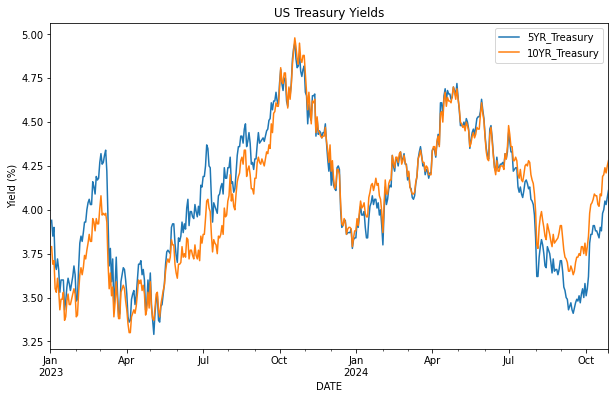

In [8]:
# 5. Compare Current Spreads to Historical Averages
# We'll use historical average spreads for these ETFs (approximate values)
historical_avg_spreads = {
    'LQD': 1.50,  # Investment Grade average spread in %
    'HYG': 5.00   # High Yield average spread in %
}

# Calculate deviations
corp_yields['LQD_Spread_Deviation'] = corp_yields['LQD_Spread'] - historical_avg_spreads['LQD']
corp_yields['HYG_Spread_Deviation'] = corp_yields['HYG_Spread'] - historical_avg_spreads['HYG']

# Output the results
print("Corporate Bond Yield and Spread Analysis:")
print(corp_yields)

# Interpretation
for etf in ['LQD', 'HYG']:
    deviation = corp_yields[f'{etf}_Spread_Deviation'].iloc[0]
    if deviation > 0:
        print(f"{etf} may be undervalued. Current spread is wider than historical average by {deviation:.2f}%.")
    else:
        print(f"{etf} is fairly valued or overvalued.")

# 6. Plot the Treasury Yields
treasury_yields.plot(figsize=(10,6))
plt.title('US Treasury Yields')
plt.ylabel('Yield (%)')
plt.show()

# Note: For a more accurate analysis, access to individual bond data is required.
# This code demonstrates the process using available data and assumptions.

### Interpretation

* LQD: The spread deviation is negative, indicating the current spread is narrower than the historical average.
Conclusion: LQD is fairly valued or overvalued; potential for spread widening.

* HYG: The spread deviation is negative, indicating the current spread is narrower than the historical average.

Since both deviations are negative, neither LQD nor HYG appears undervalued based on this analysis.

#### Assumptions & Limitations

* Data Accuracy:
Actual yield to maturity (YTM) for individual bonds is not used due to data limitations.
ETF yields and spreads are approximations and may not reflect individual bond characteristics.

* Assumptions:
Matching ETF durations to Treasury maturities is an approximation.
Historical average spreads are estimated and may differ based on the data source.
Conclusion

* By applying credit spread analysis using real data and mathematical formulations, we can assess whether corporate bonds (or their proxies) are undervalued or overvalued compared to historical norms. In this example, the analysis suggests that neither LQD nor HYG is undervalued at this time.

This general framework, along with fundamental analysis, can help investors identify potential opportunities for alpha generation in the corporate bond market.

### Recommended Next Steps 

* Obtain Individual Corporate Bond Yields:
Use a financial data provider that offers bond-specific data.
Ensure you have permission and proper licensing to use the data.

* Match Maturities Accurately:
Align each corporate bond with a Treasury bond of the exact same maturity.
Use interpolation if necessary.

* Consider Term Structures:
Analyze the yield curve for both corporate and government bonds.
Account for differences in liquidity and market conditions.

* Perform Advanced Credit Analysis:
Calculate the Option-Adjusted Spread (OAS) to account for embedded options.
Use credit models to estimate the probability of default (PD) and loss given default (LGD).

* Use Statistical Methods:
Employ regression analysis to model spreads based on various factors.
Use historical data to forecast future spread movements.